In [1]:
# Run
import matplotlib.pyplot as plt
import pandas as pd
import time
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from field import read_MS_txt, read_csv_BC, read_ACMS_txt, plot_overview, plot_PAH_ACSM, plot_ACSM_BC, plot_MS

In [2]:
# Run
parent_path = '../../../' # How many folders do you have to go back before you are out of the P: drive?

# mass spectra
path_MS = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/txt/mass_spec/'
path_ACSM = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/txt/Org_data/'

MS = read_MS_txt(path_MS, parent_path)
display(MS.keys())
display(MS['Trafic_before'].keys())

ACSM_labels = ['org', 'm202', 'm216', 'm226', 'm228', 'm252']
ACSM = read_ACMS_txt(path_ACSM, parent_path, ACSM_labels)
display(ACSM['org'].keys())

dict_keys(['Trafic_before', 'Asphalt_peak', 'After_AP', 'Trafic_after'])

Index(['mass', 'greve 28062023', 'indiakaj 13072022', 'indiakaj 14072022',
       'vesterbrogade 12062023', 'vesterbrogade 13062023'],
      dtype='object')

Index(['Time', 'Greve 28062023', 'Indiakaj 13072022', 'Indiakaj 14072022',
       'Vesterbrogade 12062023', 'Vesterbrogade 13062023'],
      dtype='object')

In [3]:
# Black carbon
path_BC_vesterbrogade = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Vesterbro_asphalt 2023/'
BC_station_vesterbrogade = ['MA200-0353']
path_BC_indiakaj = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Indiakaj_asphalt 2022/'
BC_station_indiakaj = ['S0052', 'S0055']
path_BC_greve = 'L:/PG-Nanoteknologi/Data/MA200/Raw data/Greve_asphalt_2023/'
BC_station_greve = ['MA200-0285']

BC_vesterbrogade = read_csv_BC(path_BC_vesterbrogade, parent_path, BC_station_vesterbrogade)
BC_indiakaj = read_csv_BC(path_BC_indiakaj, parent_path, BC_station_indiakaj)
BC_greve = read_csv_BC(path_BC_greve, parent_path, BC_station_greve)

print('Vesterbrogade: ', BC_vesterbrogade.keys())
print('Indiakaj: ', BC_indiakaj.keys())
print('Greve: ', BC_greve.keys())

Vesterbrogade:  dict_keys(['230612094700', '230613075200'])
Indiakaj:  dict_keys(['220713081200', '220814063001'])
Greve:  dict_keys(['230627070700', '230628065100'])


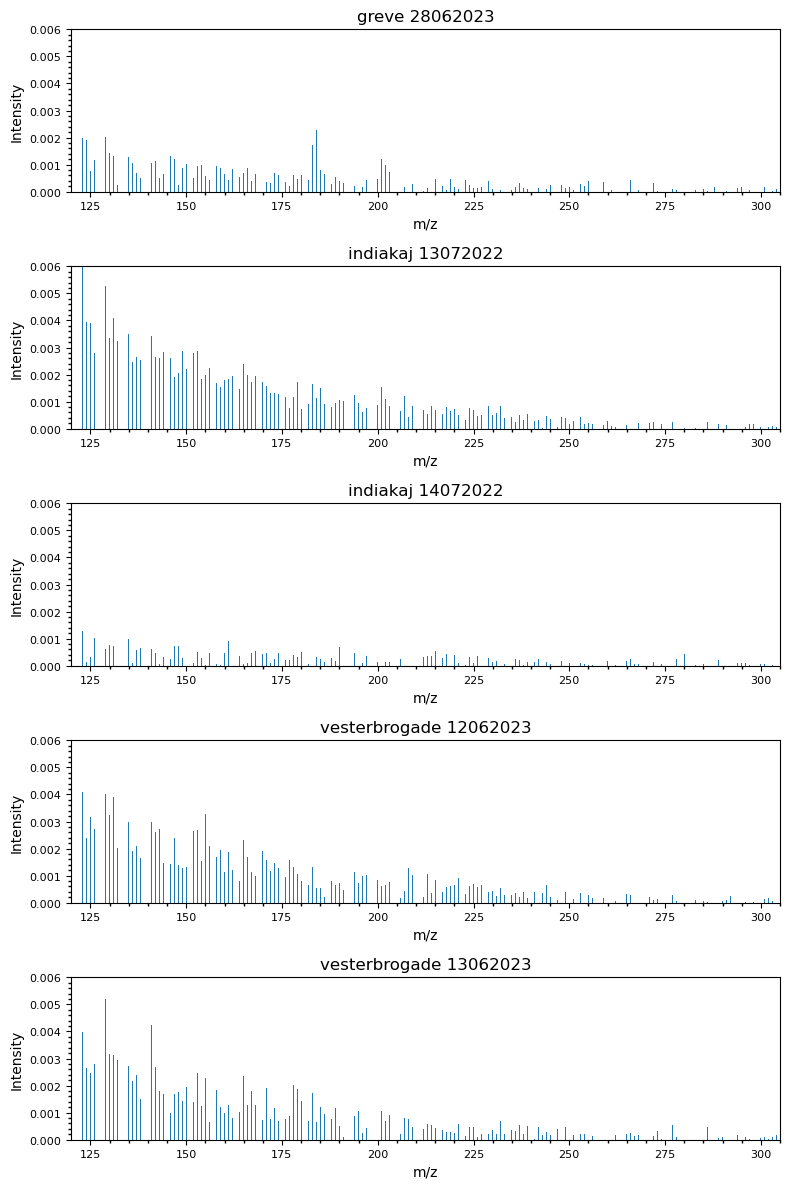

In [4]:
# Run
fig, ax = plt.subplots(5, 1, figsize = (8, 12))

for i, key in enumerate(MS['Trafic_before'].keys()[1:]):
    plot_MS(ax[i], MS['Trafic_before'], key, key)
    ax[i].set(ylim = (0, 0.006), xlim = (120, 305))

fig.tight_layout()
fig.savefig('Field_data/TraficBefore_MS_120-305.png', dpi = 600)
plt.show()

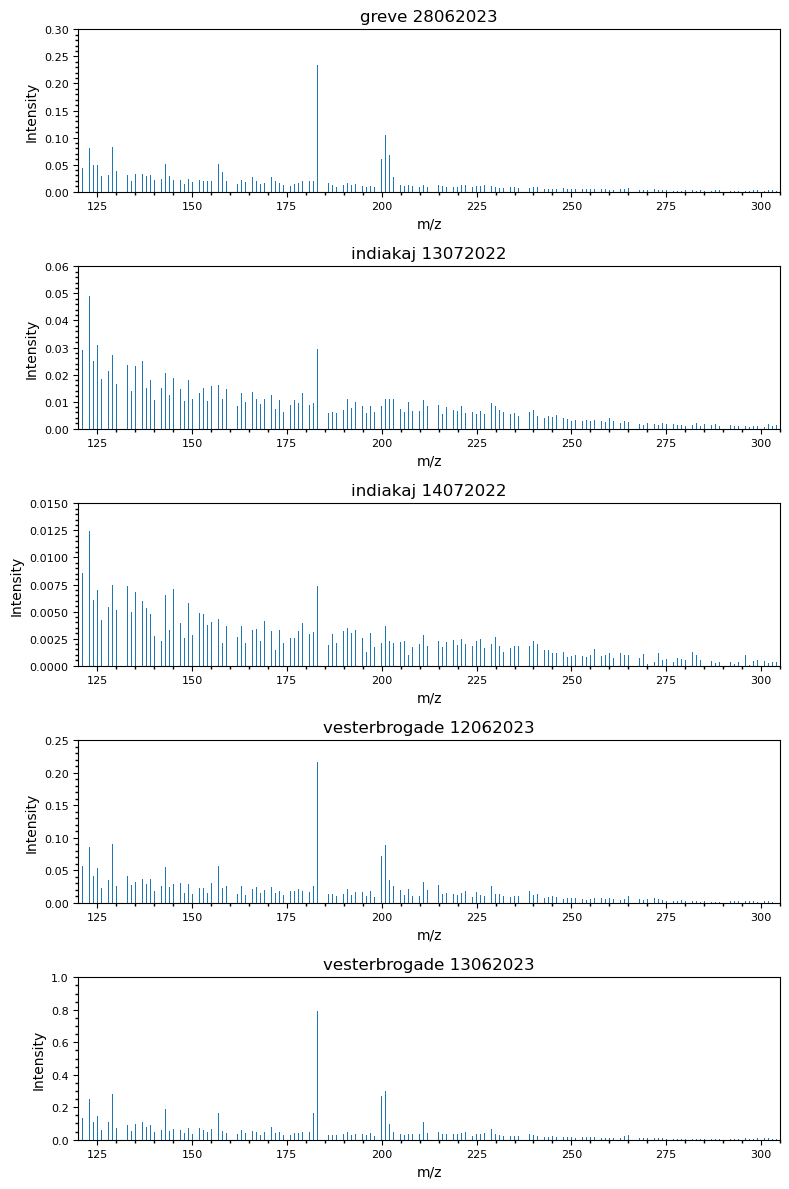

In [5]:
fig, ax = plt.subplots(5, 1, figsize = (8, 12))

for i, key in enumerate(MS['Asphalt_peak'].keys()[1:]):
    plot_MS(ax[i], MS['Asphalt_peak'], key, key)
    ax[i].set(xlim = (120, 305))

ax[0].set_ylim(0, 0.3)
ax[1].set_ylim(0, 0.06)
ax[2].set_ylim(0, 0.015)
ax[3].set_ylim(0, 0.25)
ax[4].set_ylim(0, 1)

fig.tight_layout()
fig.savefig('Field_data/Asphalt_MS_120-305.png', dpi = 600)
plt.show()

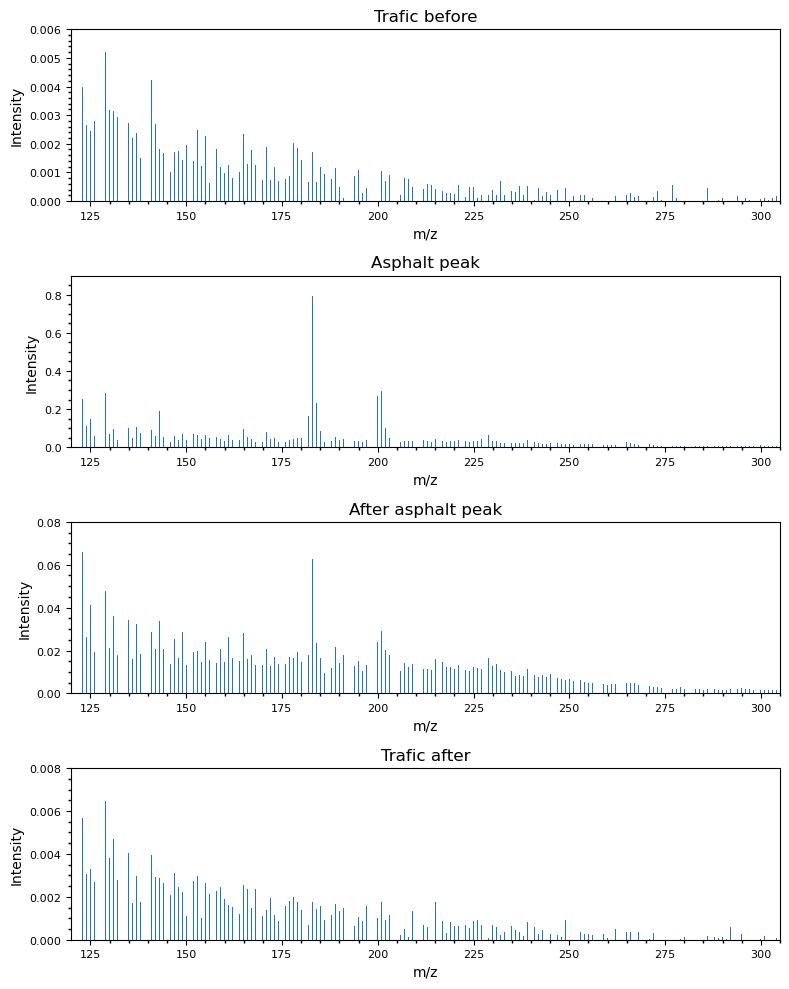

In [6]:
fig, ax = plt.subplots(4, 1, figsize = (8, 10))

plot_MS(ax[0], MS['Trafic_before'], 'vesterbrogade 13062023', 'Trafic before')
plot_MS(ax[1], MS['Asphalt_peak'], 'vesterbrogade 13062023', 'Asphalt peak')
plot_MS(ax[2], MS['After_AP'], 'vesterbrogade 13062023', 'After asphalt peak')
plot_MS(ax[3], MS['Trafic_after'], 'vesterbrogade 13062023', 'Trafic after')
ax[0].set(xlim = (120, 305), ylim = (0, 0.006))
ax[1].set(xlim = (120, 305), ylim = (0, 0.9))
ax[2].set(xlim = (120, 305), ylim = (0, 0.08))
ax[3].set(xlim = (120, 305), ylim = (0, 0.008))

fig.tight_layout()
fig.savefig('Field_data/13062023_MS_120-305.png', dpi = 600)
plt.show()

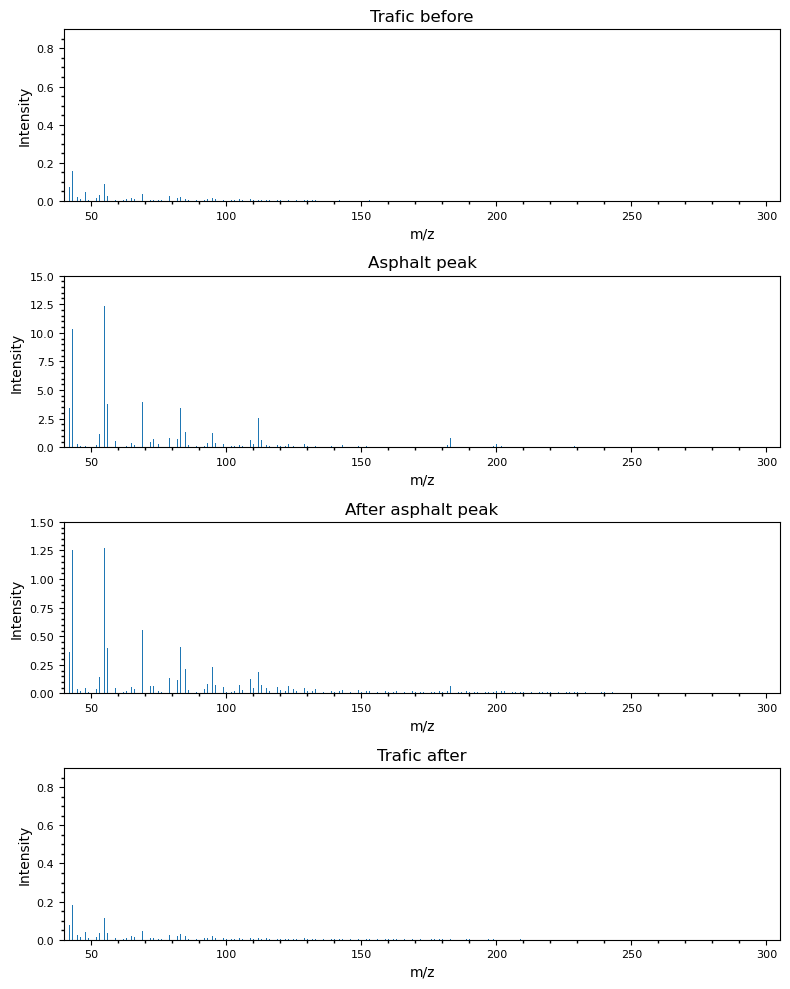

In [7]:
fig, ax = plt.subplots(4, 1, figsize = (8, 10))

plot_MS(ax[0], MS['Trafic_before'], 'vesterbrogade 13062023', 'Trafic before')
plot_MS(ax[1], MS['Asphalt_peak'], 'vesterbrogade 13062023', 'Asphalt peak')
plot_MS(ax[2], MS['After_AP'], 'vesterbrogade 13062023', 'After asphalt peak')
plot_MS(ax[3], MS['Trafic_after'], 'vesterbrogade 13062023', 'Trafic after')
ax[0].set(xlim = (40, 305), ylim = (0, 0.9))
ax[1].set(xlim = (40, 305), ylim = (0, 15))
ax[2].set(xlim = (40, 305), ylim = (0, 1.5))
ax[3].set(xlim = (40, 305), ylim = (0, 0.9))

fig.tight_layout()
fig.savefig('Field_data/13062023_MS_40-305.png', dpi = 600)
plt.show()

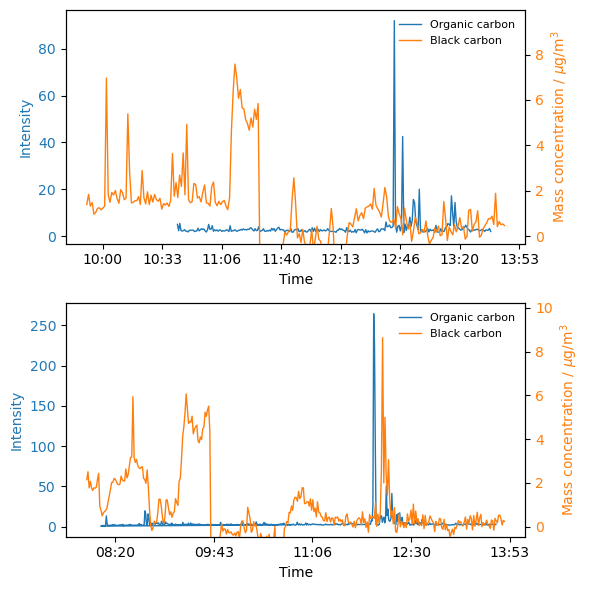

In [8]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_ACSM_BC(ax[0], ACSM['org'], BC_vesterbrogade['230612094700'], 'Vesterbrogade 12062023', 25)
plot_ACSM_BC(ax[1], ACSM['org'], BC_vesterbrogade['230613075200'][:-2], 'Vesterbrogade 13062023', 20)

fig.tight_layout()
fig.savefig('Field_data/vesterbrogade_ACSM_BC.png', dpi = 600)
plt.show()

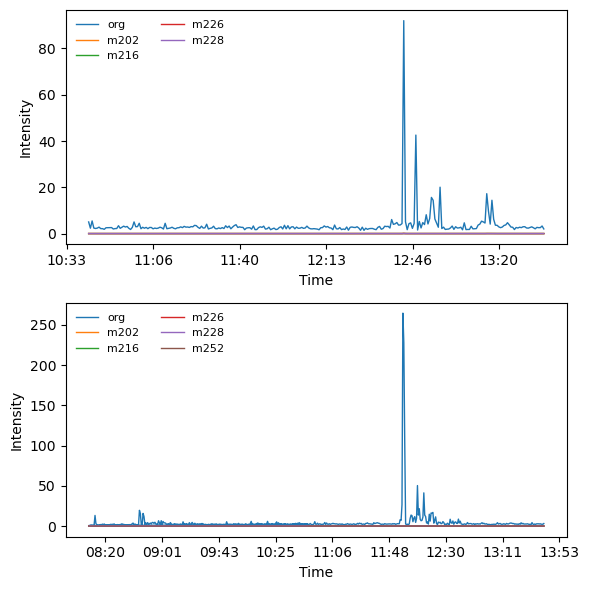

In [9]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], ACSM, 'Vesterbrogade 12062023', ACSM_labels, 2)
plot_overview(ax[1], ACSM, 'Vesterbrogade 13062023', ACSM_labels, 2)

fig.tight_layout()
fig.savefig('Field_data/Vesterbrogade_ACSM_org.png', dpi = 600)

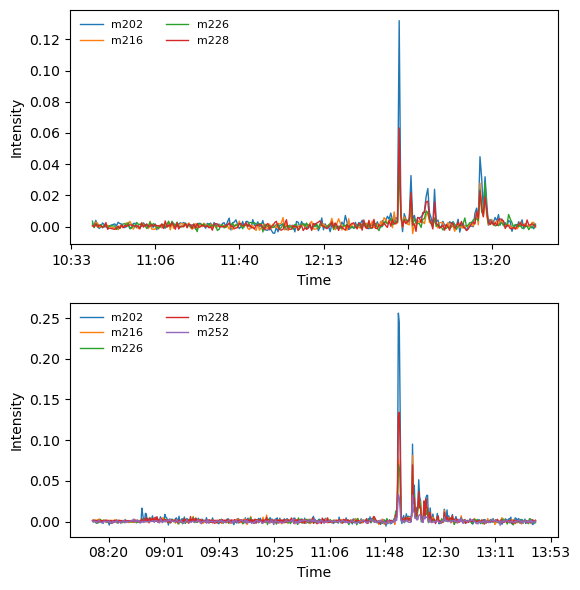

In [10]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_PAH_ACSM(ax[0], ACSM, 'Vesterbrogade 12062023', ACSM_labels, 2)
plot_PAH_ACSM(ax[1], ACSM, 'Vesterbrogade 13062023', ACSM_labels, 2)

fig.tight_layout()
fig.savefig('Field_data/Vesterbrogade_ACSM.png', dpi = 600)

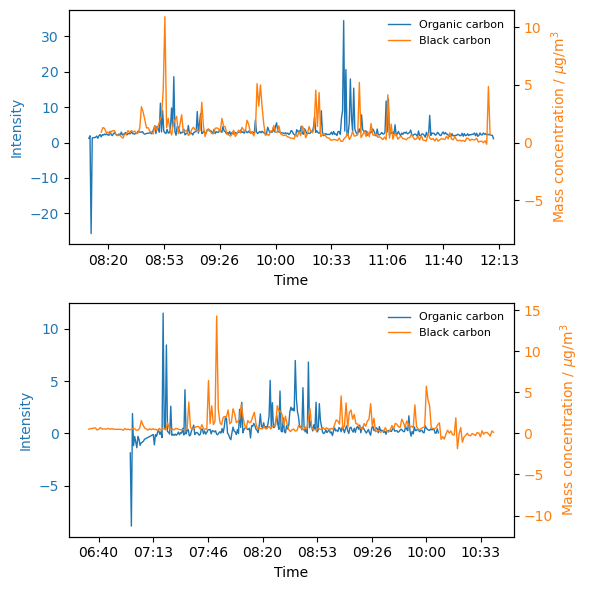

In [11]:
fig, ax = plt.subplots(2,1, figsize = (6, 6))

plot_ACSM_BC(ax[0], ACSM['org'], BC_indiakaj['220713081200'], 'Indiakaj 13072022', 1.3)
plot_ACSM_BC(ax[1], ACSM['org'], BC_indiakaj['220814063001'], 'Indiakaj 14072022', 1.2)

fig.tight_layout()
fig.savefig('Field_data/indiakaj_ACSM_BC.png', dpi = 600)
plt.show()

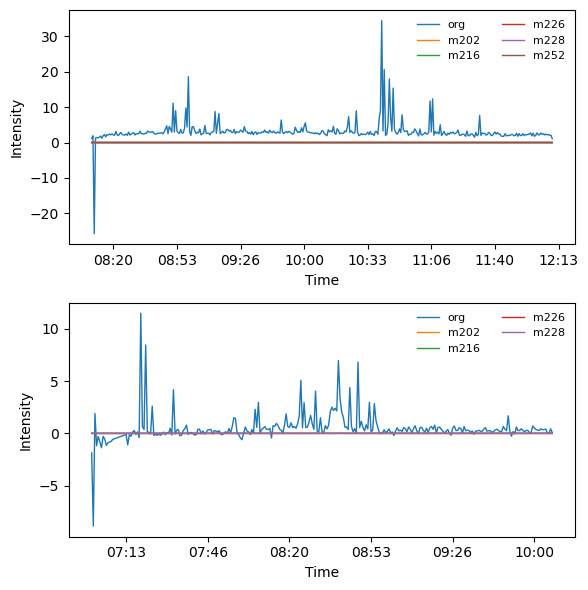

In [12]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_overview(ax[0], ACSM, 'Indiakaj 13072022', ACSM_labels, 2)
plot_overview(ax[1], ACSM, 'Indiakaj 14072022', ACSM_labels, 2)

fig.tight_layout()
fig.savefig('Field_data/Indiakaj_ACSM_org.png', dpi = 600)

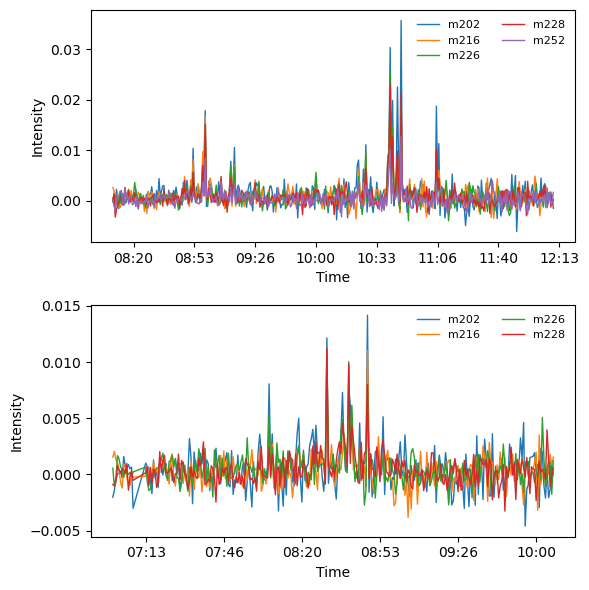

In [13]:
fig, ax = plt.subplots(2, 1, figsize = (6, 6))

plot_PAH_ACSM(ax[0], ACSM, 'Indiakaj 13072022', ACSM_labels, 2)
plot_PAH_ACSM(ax[1], ACSM, 'Indiakaj 14072022', ACSM_labels, 2)

fig.tight_layout()
fig.savefig('Field_data/Indiakaj_ACSM.png', dpi = 600)

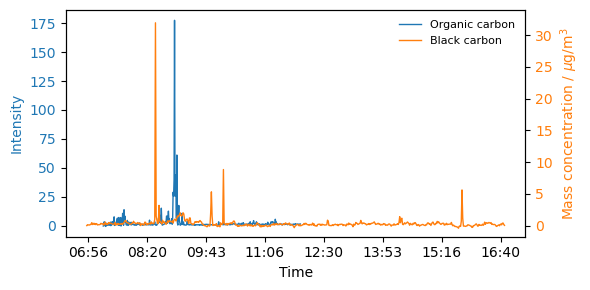

In [14]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_ACSM_BC(ax, ACSM['org'], BC_greve['230628065100'], 'Greve 28062023', 19)

fig.tight_layout()
fig.savefig('Field_data/greve_ACSM_BC.png', dpi = 600)
plt.show()

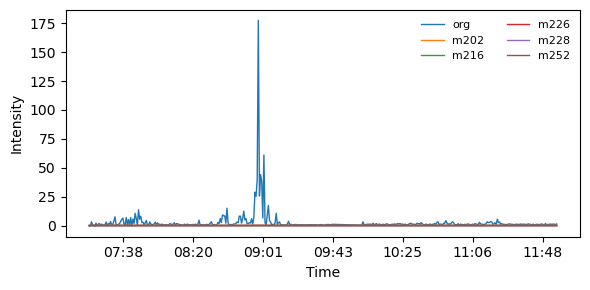

In [15]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_overview(ax, ACSM, 'Greve 28062023', ACSM_labels, 2)

fig.tight_layout()
fig.savefig('Field_data/Greve_ACSM_org.png', dpi = 600)

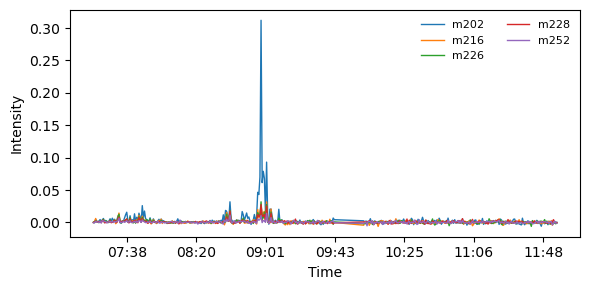

In [16]:
fig, ax = plt.subplots(figsize = (6, 3))

plot_PAH_ACSM(ax, ACSM, 'Greve 28062023', ACSM_labels, 2)

fig.tight_layout()
fig.savefig('Field_data/Greve_ACSM.png', dpi = 600)